In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 데이터 가져오기

In [2]:
X_test = pd.read_csv("data/pre_test.csv")
del X_test["Unnamed: 0"]
X_test

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,46.81,30,14.0,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,46.90,112,14.0,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,46.90,120,14.0,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,51.46,60,14.0,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,36.77,126,38.0,-,0.0,1.0,467.0
1004,C2189,382,아파트,전라북도,29.19,96,45.0,106400,0.0,2.0,300.0
1005,C2189,382,아파트,전라북도,29.19,20,45.0,106400,0.0,2.0,300.0
1006,C2189,382,아파트,전라북도,39.45,202,45.0,144600,0.0,2.0,300.0


In [3]:
X_train = pd.read_csv("data/pre_train.csv")
del X_train["Unnamed: 0"]

# X_train.info()
X_train

# X_train.sort_values(by="단지코드", ascending=True)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [4]:
car = pd.read_csv("data/자동차수.csv")
del car["Unnamed: 0"]
car

,항목,승용,승합,화물,특수
0,2015계,16561665,920320,3432937,74963
1,2015관용,27004,19079,29052,2422
2,2015자가용,15807517,776127,3020822,18103
3,2015영업용,727144,125114,383063,54438
4,2016계,17338160,892539,3492173,80479
5,2016관용,27750,20260,29834,2532
6,2016자가용,16505364,746360,3072915,20670
7,2016영업용,805046,125919,389424,57277
8,2017계,18034540,867522,3540323,85910
9,2017관용,30705,21556,30813,2687


------

# 2. 실제 등록수에 대한 주차면수

> * 실제 등록수 = 등록차량수

In [5]:
a = X_train.groupby(["지역", "단지코드"])["주차면수"].mean().to_frame()
a

주차면수
지역   단지코드        
강원도  C1045  288.0
     C1046  195.0
     C1102  525.0
     C1103  939.0
     C1206   88.0
...           ...
충청북도 C2389  694.0
     C2414  986.0
     C2437   30.0
     C2445  671.0
     C2603  393.0

[411 rows x 1 columns]

In [6]:
parking = a.groupby(["지역"])["주차면수"].sum().to_frame()
parking

,주차면수
지역,
강원도,13488.0
경기도,60773.0
경상남도,27642.0
경상북도,11687.0
광주광역시,14975.0
대구광역시,12987.0
대전광역시,18632.0
부산광역시,15731.0
서울특별시,3681.0


In [7]:
a = X_train.groupby(["지역", "단지코드"])["등록차량수"].mean().to_frame()
car = a.groupby(["지역"])["등록차량수"].sum().to_frame()
car

,등록차량수
지역,
강원도,14248.0
경기도,60608.0
경상남도,24934.0
경상북도,12511.0
광주광역시,17113.0
대구광역시,13787.0
대전광역시,16176.0
부산광역시,11853.0
서울특별시,3795.0


In [8]:
result = parking.join(car)

result["차량수/주차면수"] = result["등록차량수"] / result["주차면수"]

car_result = pd.DataFrame(result["차량수/주차면수"]).sort_values(by="차량수/주차면수", ascending=True)
car_result

,차량수/주차면수
지역,
부산광역시,0.753480
울산광역시,0.775430
충청남도,0.866856
대전광역시,0.868184
경상남도,0.902033
제주특별자치도,0.904977
충청북도,0.926551
전라남도,0.982579
경기도,0.997285


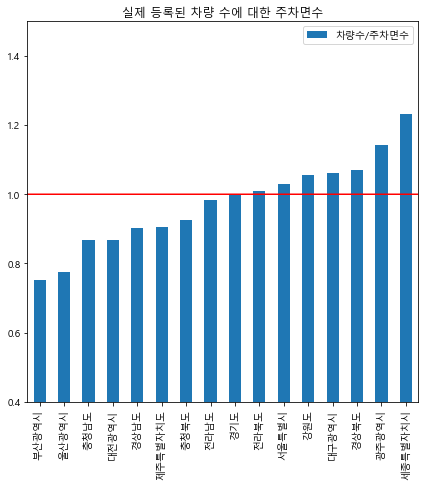

In [9]:
# 세로 막대그래프

car_result.plot(kind="bar", title="실제 등록된 차량 수에 대한 주차면수", xlabel="", figsize=(7,7), ylim=(0.4, 1.5))

plt.gca().add_line(plt.Line2D((-5,1000000),(1.0,0),color='r'))

plt.show()

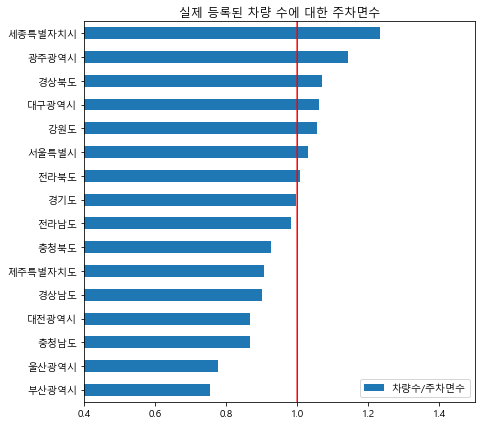

In [10]:
# 가로 막대그래프

car_result.plot(kind="barh", title="실제 등록된 차량 수에 대한 주차면수", xlabel="", figsize=(7,7), xlim=(0.4, 1.5))

plt.gca().add_line(plt.Line2D((1,0),(-1,100000),color='r'))

plt.show()

----

# 3. 세대 수에 대한 주차면수

> * 실 거주 세대 = 총 세대수 - 공가수

In [11]:
a = X_train.groupby(["지역", "단지코드"])["총세대수"].mean().to_frame()
house = a.groupby(["지역"])["총세대수"].sum().to_frame()
house

,총세대수
지역,
강원도,18033.0
경기도,69262.0
경상남도,35544.0
경상북도,12396.0
광주광역시,17222.0
대구광역시,14506.0
대전광역시,25624.0
부산광역시,28849.0
서울특별시,4361.0


In [12]:
a = X_train.groupby(["지역", "단지코드"])["빈집"].mean().to_frame()
bin_house = a.groupby(["지역"])["빈집"].sum().to_frame()
bin_house

,빈집
지역,
강원도,335.0
경기도,1005.0
경상남도,703.0
경상북도,437.0
광주광역시,376.0
대구광역시,345.0
대전광역시,288.0
부산광역시,437.0
서울특별시,57.0


In [13]:
house["실제 세대수"] = house["총세대수"] - bin_house["빈집"]
del house["총세대수"]

house

,실제 세대수
지역,
강원도,17698.0
경기도,68257.0
경상남도,34841.0
경상북도,11959.0
광주광역시,16846.0
대구광역시,14161.0
대전광역시,25336.0
부산광역시,28412.0
서울특별시,4304.0


In [14]:
result = parking.join(house)

result["주차면수/세대수"] =  result["주차면수"] / result["실제 세대수"]

house_result = pd.DataFrame(result["주차면수/세대수"]).sort_values(by="주차면수/세대수", ascending=True)
house_result

,주차면수/세대수
지역,
부산광역시,0.553675
충청남도,0.606386
대전광역시,0.735396
강원도,0.762120
경상남도,0.793376
제주특별자치도,0.813190
전라북도,0.842465
서울특별시,0.855251
울산광역시,0.872761


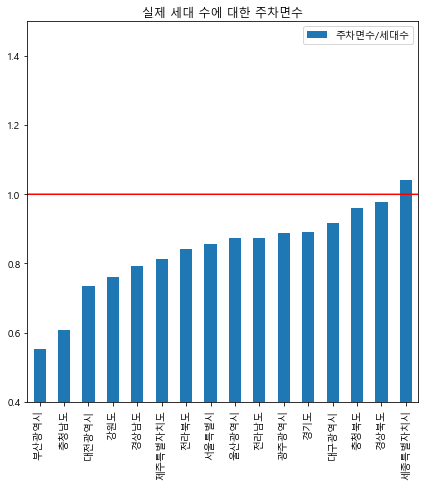

In [15]:
# 세로 막대그래프

house_result.plot(kind="bar", title="실제 세대 수에 대한 주차면수", xlabel="", figsize=(7,7), ylim=(0.4, 1.5))

plt.gca().add_line(plt.Line2D((-1,100000),(1,0),color='r'))

plt.show()

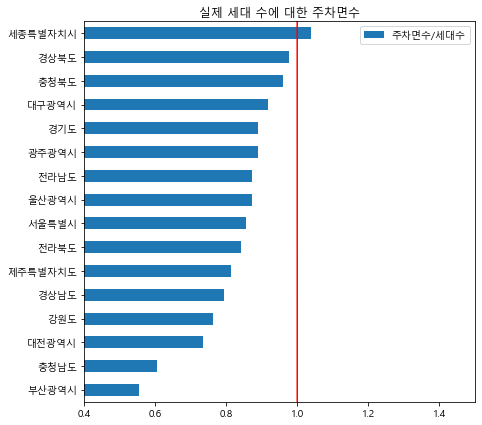

In [16]:
# 가로 막대그래프

house_result.plot(kind="barh", title="실제 세대 수에 대한 주차면수", xlabel="", figsize=(7,7), xlim=(0.4, 1.5))

plt.gca().add_line(plt.Line2D((1,0),(-1,100000),color='r'))

plt.show()

In [17]:
# 산점도 그리기

result

,주차면수,실제 세대수,주차면수/세대수
지역,,,
강원도,13488.0,17698.0,0.762120
경기도,60773.0,68257.0,0.890356
경상남도,27642.0,34841.0,0.793376
경상북도,11687.0,11959.0,0.977256
광주광역시,14975.0,16846.0,0.888935
대구광역시,12987.0,14161.0,0.917096
대전광역시,18632.0,25336.0,0.735396
부산광역시,15731.0,28412.0,0.553675
서울특별시,3681.0,4304.0,0.855251


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '지역별 세대 수에 대한 주차면수')

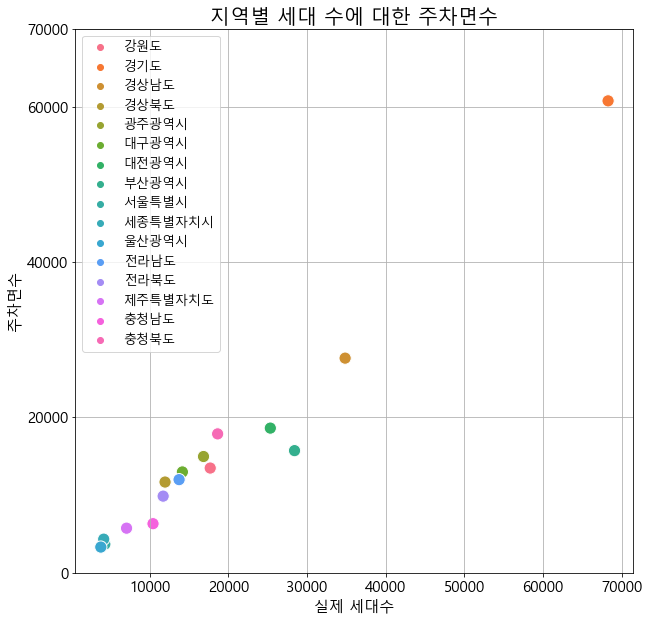

In [18]:
# 각 지역별 세대수에 대한 주차면수

plt.figure(figsize=(10,10))
sns.scatterplot("실제 세대수","주차면수", hue="지역", data=result, s=150)
plt.ylabel("주차면수", fontsize=15)
plt.xlabel("실제 세대수", fontsize=15)
plt.yticks([0,20000,40000,60000,70000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=13)
plt.title("지역별 세대 수에 대한 주차면수", fontsize=20)

In [19]:
# 각 단지별로 구하기

a = X_train.groupby(["단지코드"])["주차면수"].mean().to_frame()
a

b = X_train.groupby(["단지코드"])["총세대수"].mean().to_frame()
b

c = X_train.groupby(["단지코드"])["빈집"].sum().to_frame()
c

,빈집
단지코드,
C1000,70.0
C1004,57.0
C1005,48.0
C1013,80.0
C1014,35.0
...,...
C2663,84.0
C2666,138.0
C2670,45.0


In [20]:
b["실제 세대수"] = b["총세대수"] - c["빈집"]
del b["총세대수"]
b

,실제 세대수
단지코드,
C1000,496.0
C1004,464.0
C1005,1096.0
C1013,1228.0
C1014,961.0
...,...
C2663,688.0
C2666,946.0
C2670,603.0


In [21]:
d = a.join(b)
d.reset_index()

,단지코드,주차면수,실제 세대수
0,C1000,438.0,496.0
1,C1004,153.0,464.0
2,C1005,950.0,1096.0
3,C1013,1119.0,1228.0
4,C1014,823.0,961.0
...,...,...,...
406,C2663,700.0,688.0
407,C2666,837.0,946.0
408,C2670,600.0,603.0
409,C2680,564.0,701.0


In [22]:
loc = X_train[["단지코드","지역"]].drop_duplicates().set_index("단지코드")
loc

,지역
단지코드,
C2515,경상남도
C1407,대전광역시
C1945,경기도
C1470,전라북도
C1898,전라북도
...,...
C2586,제주특별자치도
C2035,강원도
C2020,부산광역시


In [23]:
all_house = pd.merge(loc, d, left_index=True, right_on="단지코드")
all_house

,지역,주차면수,실제 세대수
단지코드,,,
C2515,경상남도,624.0,426.0
C1407,대전광역시,1285.0,1073.0
C1945,경기도,734.0,719.0
C1470,전라북도,645.0,640.0
C1898,전라북도,517.0,512.0
...,...,...,...
C2586,제주특별자치도,66.0,55.0
C2035,강원도,521.0,372.0
C2020,부산광역시,25.0,19.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '단지별 세대 수에 대한 주차면수')

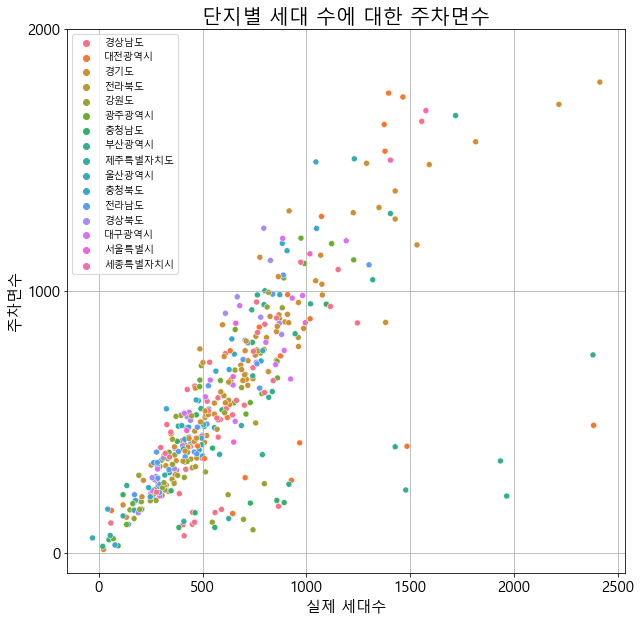

In [24]:
# 각 단지별 세대수에 대한 주차면수

plt.figure(figsize=(10,10))
sns.scatterplot("실제 세대수","주차면수", hue="지역", data=all_house)
plt.ylabel("주차면수", fontsize=15)
plt.xlabel("실제 세대수", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=10)
plt.title("단지별 세대 수에 대한 주차면수", fontsize=20)

---

# 3. 전용 면적이랑 전용 세대수로도 해보기


### 3-1. 실제 등록수에 대한 전용 주차면적¶

> * 전용면적이 해당 건물의 전용 주차칸의 수라고 생각해본다면..
> * 실제 등록수 = 등록차량수

In [25]:
parking_only = X_train.groupby(["지역"])["전용면적"].sum().to_frame()
parking_only

,전용면적
지역,
강원도,8438.04
경기도,26349.17
경상남도,15156.21
경상북도,5024.07
광주광역시,6167.93
대구광역시,4881.17
대전광역시,12576.77
부산광역시,15486.32
서울특별시,2489.15


In [26]:
result = parking_only.join(car)

result["차량수/주차전용면적"] = result["등록차량수"] / result["전용면적"]

parking_only_result = pd.DataFrame(result["차량수/주차전용면적"]).sort_values(by="차량수/주차전용면적", ascending=True)
parking_only_result

,차량수/주차전용면적
지역,
부산광역시,0.765385
충청남도,0.885090
대전광역시,1.286181
제주특별자치도,1.482136
서울특별시,1.524617
경상남도,1.645134
강원도,1.688544
울산광역시,1.736867
전라남도,1.892411


<AxesSubplot:title={'center':'실제 등록된 차량 수에 대한 주차전용면적'}>

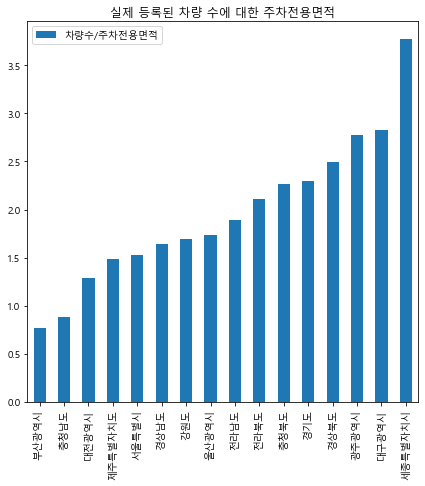

In [27]:
parking_only_result.plot(kind="bar", title="실제 등록된 차량 수에 대한 주차전용면적", xlabel="", figsize=(7,7))

# 전용 주차칸의 수가 아니라 그냥 면적인거면 의미없는듯..

### 3-1. 실제 전용면적 별 세대수에 대한 주차면수

> * 실제 전용면적 별 세대수 = 전용면적 별 세대수의 합 - 빈집

In [28]:
house_only = X_train.groupby(["지역"])["전용면적별세대수"].sum().to_frame()
house_only

,전용면적별세대수
지역,
강원도,17765
경기도,68790
경상남도,35211
경상북도,12078
광주광역시,17206
대구광역시,14498
대전광역시,25379
부산광역시,28849
서울특별시,4034


In [29]:
house_only["실제 전용면적 별 세대수"] = house_only["전용면적별세대수"] - bin_house["빈집"]
del house_only["전용면적별세대수"]

house_only

,실제 전용면적 별 세대수
지역,
강원도,17430.0
경기도,67785.0
경상남도,34508.0
경상북도,11641.0
광주광역시,16830.0
대구광역시,14153.0
대전광역시,25091.0
부산광역시,28412.0
서울특별시,3977.0


In [30]:
result = parking.join(house_only)

result["전용세대수/주차면수"] = result["실제 전용면적 별 세대수"] / result["주차면수"]

house_only_result = pd.DataFrame(result["전용세대수/주차면수"]).sort_values(by="전용세대수/주차면수", ascending=True)
house_only_result

,전용세대수/주차면수
지역,
세종특별자치시,0.961672
경상북도,0.996064
충청북도,1.036389
서울특별시,1.080413
대구광역시,1.089782
경기도,1.115380
광주광역시,1.123873
전라남도,1.134950
울산광역시,1.142469


<AxesSubplot:title={'center':'전용면적당 실제 세대 수에 대한 주차면수'}>

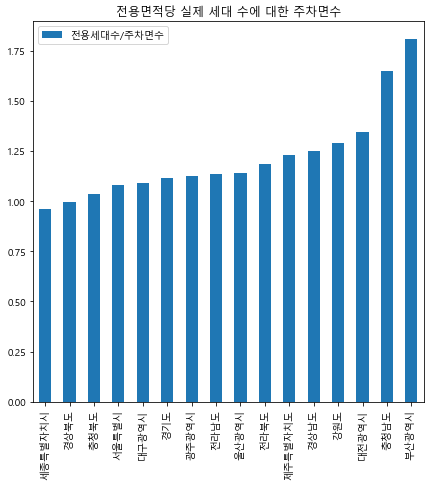

In [31]:
house_only_result.plot(kind="bar", title="전용면적당 실제 세대 수에 대한 주차면수", xlabel="", figsize=(7,7))

---

# 4. 종합

In [32]:
final = car_result.join(house_result).join(house_only_result)
final.sort_values(by="전용세대수/주차면수", ascending=False)

,차량수/주차면수,주차면수/세대수,전용세대수/주차면수
지역,,,
부산광역시,0.753480,0.553675,1.806115
충청남도,0.866856,0.606386,1.648482
대전광역시,0.868184,0.735396,1.346662
강원도,1.056346,0.762120,1.292260
경상남도,0.902033,0.793376,1.248390
제주특별자치도,0.904977,0.813190,1.229377
전라북도,1.008509,0.842465,1.186082
울산광역시,0.775430,0.872761,1.142469
전라남도,0.982579,0.873017,1.134950


* 주차면수 대비 실제 차량 등록수가 많은 지역은        [ 세종, 광주, 경북, 대구 ]이다.   적은 지역은 [ 부산, 울산, 충남, 대전]이다.
* 주차면수 대비 실제 세대수가 많은 지역은             [ 부산, 충남, 대전, 강원도 ]이다. 적은 지역은 [ 세종, 경북, 충북, 대구]이다.
* 주차면수 대비 실제 전용면적 별 세대수가 많은 지역은 [ 부산, 충남, 대전, 강원도 ]이다. 적은 지역은 [ 세종, 경북, 충북, 서울]이다.